## Chaper 4 Accuracy and Performance of the Integration
---

### 4.1 Structuring the code

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [9]:
def ode_two_body(x, t, params):
    G = params['G']
    masses = params['masses']
    
    r1 = x[0:3]
    r2 = x[3:6]
    r3 = np.linalg.norm(r1 - r2)**3
    
    dxdt = x * 0
    
    dxdt[0:3]  = x[6:9]
    dxdt[3:6]  = x[9:12]
    dxdt[6:9]  = -G * masses[0] * (r1 - r2) / r3
    dxdt[9:12] = -G * masses[1] * (r2 - r1) / r3
    
    return dxdt

In [10]:
def integrate_euler(x0, t0, tf, dt, params):
    npts = int(np.floor((tf - t0) / dt)) + 1
    x = x0

    time = np.linspace(t0, t0 + dt * (npts - 1), npts)
    state = np.zeros((npts, len(x0)))
    state[0,:] = x
                     
    for count, t in enumerate(time[1:], 1):
        dxdt = ode_two_body(x, t, params)
        x = x + dxdt * dt
        state[count,:] = x
        
    return time, state

In [17]:
def init():
    G = 1.0
    masses = [1.0, 1.0]
    params = {'G': G, 'masses': masses}

    r1 = np.array([1, 0, 0])   # particle 1 initial position
    r2 = np.array([-1, 0, 0])    # particle 2 initial position
    v1 = np.array([0, 0.5, 0]) # particle 1 initial velocity
    v2 = np.array([0, -0.5, 0])  # particle 2 initial vecolity
    x0 = np.concatenate((r1, r2, v1, v2))

    t0 = 0.0
    tf = 100.0
    dt = 0.0001
    
    return x0, t0, tf, dt, params

In [18]:
def plot(state):
    plt.plot(state[:,0], state[:,1],"b-")
    plt.plot(state[:,3], state[:,4],"g-")
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.axis('equal')
    plt.show()

Executed in 18.256 seconds


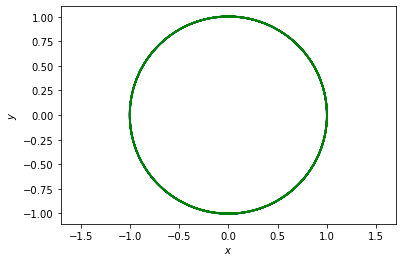

In [20]:
start = timeit.default_timer()
x0, t0, tf, dt, params = init()
time, state = integrate_euler(x0, t0, tf, dt, params)
stop = timeit.default_timer()
print('Executed in {:.5} seconds'.format(stop - start))
plot(state)

### 4.3 Checking the conservation laws

In [27]:
def compute_energy(state, params):
    G = params['G']
    masses = params['masses']
    
    energy = state[:,0] * 0
    
    for count, x in enumerate(state):
        energy[count] = 0.5 * masses[0] * np.linalg.norm(x[6:9])**2 + 0.5 * masses[1] * np.linalg.norm(x[9:12])**2 \
                        - G * masses[0] * masses[1] / np.linalg.norm(x[3:6] - x[0:3])
    return energy

In [28]:
energy = compute_energy(state, params)

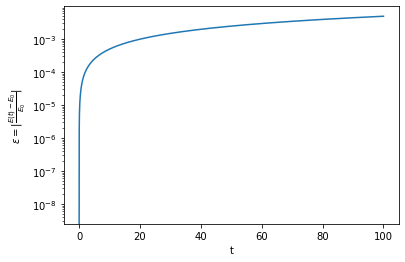

In [39]:
plt.semilogy(time, np.abs((energy - energy[0]) / energy[0]))
plt.xlabel('t')
plt.ylabel('$\\epsilon=|\\frac{E(t)-E_0}{E_0}|$')
plt.show()


In [40]:
def compute_angular_momentum(state, params):
    G = params['G']
    masses = params['masses']
    
    momentum = state[:,0] * 0
    
    for count, x in enumerate(state):
        momentum[count] = np.linalg.norm(masses[0] * np.cross(x[0:3], x[6:9]) \
                                  + masses[1] * np.cross(x[3:6], x[9:12]))
    return momentum    

In [41]:
momentum = compute_angular_momentum(state, params)

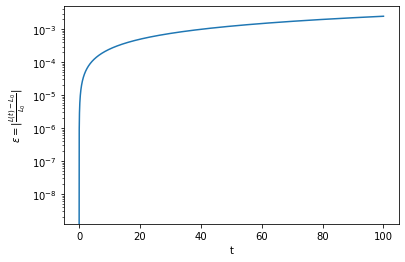

In [42]:
plt.semilogy(time, np.abs((momentum - momentum[0]) / momentum[0]))
plt.xlabel('t')
plt.ylabel('$\\epsilon=|\\frac{L(t)-L_0}{L_0}|$')
plt.show()
